Projeto Ciencia de Dados: Carteira de Ações com Inteligência Artificial
Projeto Inspiração: https://medium.com/swlh/teaching-a-machine-to-trade-stocks-like-warren-buffett-part-i-445849b208c6
Resumo Fundamentos Empresas BR: https://fundamentus.com.br/index.php

Criar Dicionários de Dataframes com cada empresa

In [1]:
import pandas as pd
import os

empresas = ["ABEV3", "AZUL4", "BTOW3", "B3SA3", "BBSE3", "BRML3", "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRFS3", "BPAC11", "CRFB3", "CCRO3", "CMIG4", "HGTX3", "CIEL3", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CVCB3", "CYRE3", "ECOR3", "ELET6", "EMBR3", "ENBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "NTCO3", "HAPV3", "HYPE3", "IGTA3", "GNDI3", "ITSA4", "ITUB4", "JBSS3", "JHSF3", "KLBN11", "RENT3", "LCAM3", "LAME4", "LREN3", "MGLU3", "MRFG3", "BEEF3", "MRVE3", "MULT3", "PCAR3", "PETR4", "BRDT3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "SBSP3", "SANB11", "CSNA3", "SULA11", "SUZB3", "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VVAR3", "WEGE3", "YDUQ3"]
# fundamentos = {
#     "ABEV3": balanco_dre_abev3,
#     "MGLU3": balanco_dre_mglu3
# }
fundamentos = {}
arquivos = os.listdir("balancos")
for arquivo in arquivos:
    nome = arquivo[-9:-4]
    if "11" in nome:
        nome = arquivo[-10:-4]
    if nome in empresas:
        print(nome)
        # pegar o balanco daquela empresa
        balanco = pd.read_excel(f'balancos/{arquivo}', sheet_name=0)
        # na primeira coluna colocar o título com o nome da empresa
        balanco.iloc[0, 0] = nome
        # pegar 1ª linha e tornar um cabeçalho
        balanco.columns = balanco.iloc[0]
        balanco = balanco[1:]
        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        balanco = balanco.set_index(nome)
        dre = pd.read_excel(f'balancos/{arquivo}', sheet_name=1)
        # na primeira coluna colocar o título com o nome da empresa
        dre.iloc[0, 0] = nome
        # pegar 1ª linha e tornar um cabeçalho
        dre.columns = dre.iloc[0]
        dre = dre[1:]
        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        dre = dre.set_index(nome)
        fundamentos[nome] = pd.concat([balanco, dre])

ABEV3
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
AZUL4
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
B3SA3
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
BBAS3
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 

Pegar Preços das Ações nas Datas Correspondentes

In [2]:
cotacoes_df = pd.read_excel("Cotacoes.xlsx")
cotacoes = {}
for empresa in cotacoes_df["Empresa"].unique():
    cotacoes[empresa] = cotacoes_df.loc[cotacoes_df['Empresa']==empresa, :]

In [3]:
print(len(cotacoes))

77


Remover empresas que tem cotações vazias da análise (mesmo após o tratamento que fizemos na hora de pegar as cotações)

In [4]:
for empresa in empresas:
    if cotacoes[empresa].isnull().values.any():
        cotacoes.pop(empresa)
        fundamentos.pop(empresa)
empresas = list(cotacoes.keys())
print(len(empresas))

65


Juntar fundamentos com Preço da Ação

In [5]:
# no cotacoes: jogar as datas para índice
# no fundamnetos:
    # trocar linhas por colunas
    # tratar as datas para formato de data do python
    # juntar os fundamentos com a coluna Adj Close das cotacoes
for empresa in fundamentos:
    tabela = fundamentos[empresa].T
    tabela.index = pd.to_datetime(tabela.index, format="%d/%m/%Y")
    tabela_cotacao = cotacoes[empresa].set_index("Date")
    tabela_cotacao = tabela_cotacao[["Adj Close"]]
    
    tabela = tabela.merge(tabela_cotacao, right_index=True, left_index=True)
    tabela.index.name = empresa
    fundamentos[empresa] = tabela
display(fundamentos["ABEV3"])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período,Adj Close
ABEV3,,,,,,,,,,,,,,,,,,,,,
2020-12-31,125196574.72,35342614.528,17090335.744,1700028.032,4303137.792,7605904.896,0,3287141.888,293552,1062513.984,...,NaN,NaN,8464308.224,93644,-1667579.008,NaN,NaN,-104363.008,6786009.6,15.575767
2020-09-30,127056781.312,39098793.984,21660450.816,1442923.008,4156922.88,7341836.8,0,3472880.896,298303.008,725478.976,...,NaN,NaN,2431040,-415548,343476,NaN,NaN,-84167,2274800.896,12.159024
2020-06-30,121393004.544,36268126.208,17438951.424,44823,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,NaN,NaN,1108173.056,-431944.992,595088,NaN,NaN,-44517,1226798.976,13.710416
2020-03-31,113687560.192,31086356.48,13204471.808,44823,3394298.112,7752655.872,0,5266407.936,447473.984,976225.024,...,NaN,NaN,1490919.936,-295032.992,15365,NaN,NaN,-119468,1091783.936,11.557861
2019-12-31,101742944.256,27621136.384,11900665.856,14558,4495524.864,5978556.928,0,4074127.104,512532,645171.968,...,NaN,NaN,3755047.68,1317924.992,-853995.008,NaN,NaN,-119273.008,4099704.832,18.102791
2019-09-30,102475317.248,29004025.856,15016913.92,14304,4236257.024,5978811.904,0,2545863.936,293060,918814.976,...,NaN,NaN,2826416.896,-649270.016,427238.016,NaN,NaN,-106708,2497677.056,18.187490
2019-06-30,98738978.816,27356035.072,14233403.392,14038,4103118.08,6197564.928,0,1542556.032,507216,758140.992,...,NaN,NaN,2980011.008,-807523.968,443414.016,NaN,NaN,-95168,2520732.928,16.902554
2019-03-31,96905535.488,26194137.088,12822524.928,13772,3980359.936,6032743.936,0,1980342.016,591273.984,773121.024,...,NaN,NaN,3381529.088,-979185.024,346724,NaN,NaN,-87218,2661850.112,15.901062
2018-12-31,94126137.344,25329604.608,11463497.728,13391,4879256.064,5401793.024,0,2148713.984,741222.016,681731.008,...,NaN,NaN,4591409.152,33055.072,-1160932.992,NaN,NaN,-103125.992,3360404.736,14.531096


Tratar colunas
Vamos pegar apenas empresas que possuem as mesmas colunas
Ajeitar colunas com nome repetido
Analisar valores vazios nas colunas

Remover da análise tabelas que tem colunas diferentes

In [6]:
colunas = list(fundamentos["ABEV3"].columns)

for empresa in empresas:
    if set(colunas) != set(fundamentos[empresa].columns):
        fundamentos.pop(empresa)
print(len(fundamentos))

61


Ajeitando colunas com o mesmo nome

In [7]:
texto_colunas = ";".join(colunas)

colunas_modificadas = []
for coluna in colunas:
    if colunas.count(coluna) == 2 and coluna not in colunas_modificadas:
        texto_colunas = texto_colunas.replace(";" + coluna + ";",";" + coluna + "_1;", 1)
        colunas_modificadas.append(coluna)
colunas = texto_colunas.split(';')
print(colunas)

['Ativo Total', 'Ativo Circulante', 'Caixa e Equivalentes de Caixa', 'Aplicações Financeiras', 'Contas a Receber_1', 'Estoques_1', 'Ativos Biológicos_1', 'Tributos a Recuperar', 'Despesas Antecipadas_1', 'Outros Ativos Circulantes', 'Ativo Realizável a Longo Prazo', 'Aplicações Financeiras Avaliadas a Valor Justo', 'Aplicações Financeiras Avaliadas ao Custo Amortizado', 'Contas a Receber', 'Estoques', 'Ativos Biológicos', 'Tributos Diferidos_1', 'Despesas Antecipadas', 'Créditos com Partes Relacionadas', 'Outros Ativos Não Circulantes', 'Investimentos', 'Imobilizado', 'Intangível', 'Diferido', 'Passivo Total', 'Passivo Circulante', 'Obrigações Sociais e Trabalhistas', 'Fornecedores', 'Obrigações Fiscais', 'Empréstimos e Financiamentos_1', 'Passivos com Partes Relacionadas_1', 'Dividendos e JCP a Pagar', 'Outros_1', 'Provisões_1', 'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados_1', 'Passivo Não Circulante', 'Empréstimos e Financiamentos', 'Passivos com Partes Relacionadas'

In [8]:
# implementar as colunas nas tabelas

for empresa in fundamentos:
    fundamentos[empresa].columns = colunas

Analisar valores vazios nas colunas

In [9]:
# valores_vazios = {
#     "Ativo Total": 0,
#     "Passivo Total": 0,
# }
valores_vazios = dict.fromkeys(colunas, 0)
total_linhas = 0
for empresa in fundamentos:
    tabela = fundamentos[empresa]
    total_linhas += tabela.shape[0]
    for coluna in colunas:
        qtde_vazios = pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna] += qtde_vazios
print(valores_vazios)
print(total_linhas)

{'Ativo Total': np.int64(0), 'Ativo Circulante': np.int64(0), 'Caixa e Equivalentes de Caixa': np.int64(0), 'Aplicações Financeiras': np.int64(0), 'Contas a Receber_1': np.int64(0), 'Estoques_1': np.int64(0), 'Ativos Biológicos_1': np.int64(0), 'Tributos a Recuperar': np.int64(0), 'Despesas Antecipadas_1': np.int64(0), 'Outros Ativos Circulantes': np.int64(0), 'Ativo Realizável a Longo Prazo': np.int64(0), 'Aplicações Financeiras Avaliadas a Valor Justo': np.int64(0), 'Aplicações Financeiras Avaliadas ao Custo Amortizado': np.int64(0), 'Contas a Receber': np.int64(0), 'Estoques': np.int64(0), 'Ativos Biológicos': np.int64(0), 'Tributos Diferidos_1': np.int64(0), 'Despesas Antecipadas': np.int64(0), 'Créditos com Partes Relacionadas': np.int64(0), 'Outros Ativos Não Circulantes': np.int64(0), 'Investimentos': np.int64(0), 'Imobilizado': np.int64(0), 'Intangível': np.int64(0), 'Diferido': np.int64(0), 'Passivo Total': np.int64(0), 'Passivo Circulante': np.int64(0), 'Obrigações Sociais e 

In [10]:
remover_colunas = []
for coluna in valores_vazios:
    if valores_vazios[coluna] > 50:
        remover_colunas.append(coluna)

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1)
    fundamentos[empresa] = fundamentos[empresa].ffill()

C:\Users\Yago\AppData\Local\Temp\ipykernel_16908\3551942261.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fundamentos[empresa] = fundamentos[empresa].ffill()
C:\Users\Yago\AppData\Local\Temp\ipykernel_16908\3551942261.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fundamentos[empresa] = fundamentos[empresa].ffill()
C:\Users\Yago\AppData\Local\Temp\ipykernel_16908\3551942261.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) ins

In [11]:
fundamentos["ABEV3"].shape

(33, 72)

Criando os rótulos: Comprar, Não Comprar ou Vender?

In [12]:
import yfinance as yf
from datetime import datetime

data_inicial = datetime(2012, 12, 20)
data_final = datetime(2021, 4, 20)

df_ibov = yf.download('^BVSP', start=data_inicial, end=data_final)

# Achata o multi-index das colunas se existir
if isinstance(df_ibov.columns, pd.MultiIndex):
    df_ibov.columns = df_ibov.columns.get_level_values(0)

display(df_ibov)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2012-12-20,61276.0,61276.0,60622.0,60992.0,3083400
2012-12-21,61007.0,61271.0,60221.0,61271.0,3157400
2012-12-26,60960.0,61322.0,60861.0,61003.0,2598000
2012-12-27,60416.0,61191.0,60233.0,60964.0,2852600
2012-12-28,60952.0,61066.0,60416.0,60416.0,2626000
...,...,...,...,...,...
2021-04-13,119297.0,119529.0,118041.0,118809.0,8977600
2021-04-14,120295.0,120871.0,119298.0,119298.0,10076600
2021-04-15,120701.0,121409.0,120084.0,120290.0,7948100


In [13]:
import numpy as np

# Garante que o índice de df_ibov é datetime
df_ibov.index = pd.to_datetime(df_ibov.index)

# Preenche as datas ausentes em df_ibov com NaN
datas = fundamentos["ABEV3"].index
for data in datas:
    if data not in df_ibov.index:
        df_ibov.loc[data] = np.nan

# Organiza o índice e preenche valores ausentes
df_ibov = df_ibov.sort_index()
df_ibov = df_ibov.ffill()

# Renomeia a coluna desejada (verifique se "Close" é a coluna correta)
df_ibov = df_ibov.rename(columns={"Close": "IBOV"})

# Junta a coluna IBOV a cada DataFrame de fundamentos
for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].merge(
        df_ibov[["IBOV"]], left_index=True, right_index=True
    )

# Exibe resultado
display(fundamentos["ABEV3"])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV
2020-12-31,1.251966e+08,3.534261e+07,1.709034e+07,1700028.032,4303137.792,7605904.896,0,3287141.888,293552.000,1062513.984,...,-9428,1040928.960,2144160.000,-1103231.104,8464308.224,93644.000,-1667579.008,6786009.600,15.575767,119306.0
2020-09-30,1.270568e+08,3.909879e+07,2.166045e+07,1442923.008,4156922.880,7341836.800,0,3472880.896,298303.008,725478.976,...,-11002,-1144775.936,369476.992,-1514253.056,2431040.000,-415548.000,343476.000,2274800.896,12.159024,94603.0
2020-06-30,1.213930e+08,3.626813e+07,1.743895e+07,44823.000,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,-16237,-793734.976,236606.000,-1030340.992,1108173.056,-431944.992,595088.000,1226798.976,13.710416,95056.0
2020-03-31,1.136876e+08,3.108636e+07,1.320447e+07,44823.000,3394298.112,7752655.872,0,5266407.936,447473.984,976225.024,...,-6617,-1536866.944,245776.000,-1782642.944,1490919.936,-295032.992,15365.000,1091783.936,11.557861,73020.0
2019-12-31,1.017429e+08,2.762114e+07,1.190067e+07,14558.000,4495524.864,5978556.928,0,4074127.104,512532.000,645171.968,...,-11195,-1564263.936,234065.056,-1798328.832,3755047.680,1317924.992,-853995.008,4099704.832,18.102791,115964.0
2019-09-30,1.024753e+08,2.900403e+07,1.501691e+07,14304.000,4236257.024,5978811.904,0,2545863.936,293060.000,918814.976,...,-8248,-305798.016,867204.992,-1173003.008,2826416.896,-649270.016,427238.016,2497677.056,18.187490,104745.0
2019-06-30,9.873898e+07,2.735604e+07,1.423340e+07,14038.000,4103118.080,6197564.928,0,1542556.032,507216.000,758140.992,...,-731,-567436.992,249903.008,-817340.032,2980011.008,-807523.968,443414.016,2520732.928,16.902554,100967.0
2019-03-31,9.690554e+07,2.619414e+07,1.282252e+07,13772.000,3980359.936,6032743.936,0,1980342.016,591273.984,773121.024,...,-2136,-672067.968,287692.992,-959761.024,3381529.088,-979185.024,346724.000,2661850.112,15.901062,95415.0
2018-12-31,9.412614e+07,2.532960e+07,1.146350e+07,13391.000,4879256.064,5401793.024,0,2148713.984,741222.016,681731.008,...,1140,-1618994.944,19940.992,-1638935.808,4591409.152,33055.072,-1160932.992,3360404.736,14.531096,87887.0
2018-09-30,9.569104e+07,2.620002e+07,1.222767e+07,13008.000,4285633.024,5349087.232,0,2215026.944,439839.008,1669756.032,...,-3272,-611080.000,245288.992,-856369.024,2754401.024,-475184.992,612889.984,2831159.040,16.978544,79342.0


In [14]:
# tornar os nossos indicadores em percentuais
# fundamento%tri = fundamento tr / fundamento tri anterior
# cotacao%tri = cotacao tri seguinte / cotacao tri
for empresa in fundamentos:
    fundamento = fundamentos[empresa]
    fundamento = fundamento.sort_index()
    for coluna in fundamento:
        if "Adj Close" in coluna or "IBOV" in coluna:
            pass
        else:
            # pegar a cotação anterior
            condicoes = [
                (fundamento[coluna].shift(1) > 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] > 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] > 0),
                (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] == 0),
            ]
            valores = [
                -1,
                1,
                (abs(fundamento[coluna].shift(1)) - abs(fundamento[coluna])) / abs(fundamento[coluna].shift(1)),
                1,
                -1,
                1,
            ]
            fundamento[coluna] = np.select(condicoes, valores, default=fundamento[coluna] / fundamento[coluna].shift(1) - 1)
    # pegar cotação seguinte
    fundamento["Adj Close"] = fundamento["Adj Close"].shift(-1) / fundamento["Adj Close"] - 1
    fundamento["IBOV"] = fundamento["IBOV"].shift(-1) / fundamento["IBOV"] - 1
    fundamento["Resultado"] = fundamento["Adj Close"] - fundamento["IBOV"]
    condicoes = [
        (fundamento["Resultado"] > 0),
        (fundamento["Resultado"] < 0) & (fundamento["Resultado"] >= -0.02),
        (fundamento["Resultado"] < -0.02)
    ]
    valores = [2, 1, 0]
    fundamento["Decisao"] = np.select(condicoes, valores)
    
    fundamentos[empresa] = fundamento
display(fundamentos["ABEV3"])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV,Resultado,Decisao
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.013860,-0.075469,0.061609,2
2013-03-31,-0.004402,0.082509,0.540941,NaN,-0.855514,NaN,NaN,-0.878257,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.011719,-0.157847,0.169566,2
2013-06-30,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,NaN,3040.654255,1.000000,1.000000,...,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,0.029640,0.102851,-0.073211,0
2013-09-30,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,NaN,0.150925,-0.053987,0.184512,...,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,0.022673,-0.015878,0.038551,2
2013-12-31,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,NaN,0.642232,0.326698,0.198435,...,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,-0.012411,-0.021201,0.008790,2
2014-03-31,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,NaN,0.016833,-0.133515,0.226973,...,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,-0.066860,0.054607,-0.121467,0
2014-06-30,-0.004866,-0.035410,-0.140116,-0.073713,0.137713,0.018993,NaN,0.063286,-0.189384,0.071060,...,0.329060,0.004367,-0.215038,0.699624,-0.923330,-0.149121,0.027849,0.017830,0.010019,2
2014-09-30,0.033925,-0.020712,-0.083799,0.386513,-0.074255,0.012343,NaN,0.129495,-0.024556,0.237706,...,0.250902,0.013409,0.323985,-1.989595,14.392936,0.298455,0.030113,-0.075929,0.106043,2
2014-12-31,0.107749,0.341943,0.691348,0.353403,-0.075340,0.079871,NaN,-0.072745,0.448937,2.030331,...,-0.001110,-0.646470,0.673428,1.000000,-1.000000,0.613021,0.219934,0.022857,0.197077,2
2015-03-31,0.041002,-0.071757,-0.282603,0.449956,-0.043301,0.283355,NaN,-0.118599,-0.102662,0.249493,...,-0.157968,0.171903,-0.285186,-1.000000,0.967386,-0.380692,0.033152,0.037752,-0.004600,1


In [15]:
#remover valores vazios
colunas = list(fundamentos["ABEV3"].columns)
valores_vazios = dict.fromkeys(colunas, 0)
total_linhas = 0
for empresa in fundamentos:
    tabela = fundamentos[empresa]
    total_linhas += tabela.shape[0]
    for coluna in colunas:
        qtde_vazios = pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna] += qtde_vazios
print(valores_vazios)
print(total_linhas)

{'Ativo Total': np.int64(61), 'Ativo Circulante': np.int64(61), 'Caixa e Equivalentes de Caixa': np.int64(61), 'Aplicações Financeiras': np.int64(623), 'Contas a Receber_1': np.int64(65), 'Estoques_1': np.int64(483), 'Ativos Biológicos_1': np.int64(1874), 'Tributos a Recuperar': np.int64(266), 'Despesas Antecipadas_1': np.int64(1059), 'Outros Ativos Circulantes': np.int64(281), 'Ativo Realizável a Longo Prazo': np.int64(61), 'Aplicações Financeiras Avaliadas a Valor Justo': np.int64(1581), 'Aplicações Financeiras Avaliadas ao Custo Amortizado': np.int64(1661), 'Contas a Receber': np.int64(937), 'Estoques': np.int64(1434), 'Ativos Biológicos': np.int64(1823), 'Tributos Diferidos_1': np.int64(822), 'Despesas Antecipadas': np.int64(1130), 'Créditos com Partes Relacionadas': np.int64(1271), 'Outros Ativos Não Circulantes': np.int64(426), 'Investimentos': np.int64(345), 'Imobilizado': np.int64(62), 'Intangível': np.int64(86), 'Diferido': np.int64(2004), 'Passivo Total': np.int64(61), 'Passi

In [16]:
remover_colunas = []
for coluna in valores_vazios:
    if valores_vazios[coluna] > (total_linhas / 3):
        remover_colunas.append(coluna)

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1)
    fundamentos[empresa] = fundamentos[empresa].fillna(0)

Tornando tudo 1 DataFrame unico

In [17]:
for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(["Adj Close", "IBOV", "Resultado"], axis=1)
print(fundamentos["ABEV3"].shape)

(33, 47)


In [18]:
copia_fundamentos = fundamentos.copy()

In [19]:
lista_df = []

for empresa in copia_fundamentos:
    df = copia_fundamentos[empresa][1:-1].reset_index(drop=True)
    lista_df.append(df)

base_dados = pd.concat(lista_df, ignore_index=True)
display(base_dados)


,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Decisao
0,-0.004402,0.082509,0.540941,0.000000,-0.855514,0.000000,-0.878257,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,3040.654255,1.000000,2.274961,1.000000,...,-281.496855,1.000000,-1.000000,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,0
2,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,0.150925,0.184512,-0.007786,0.079940,...,0.156800,39.123711,-0.840737,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,2
3,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,0.642232,0.198435,-0.023974,0.080787,...,-3.692296,0.909044,-0.618082,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,2
4,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,0.016833,0.226973,-0.062046,-0.039055,...,0.658483,0.059219,0.539649,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,0.031644,0.028168,-0.481838,0.224456,-0.121143,0.000000,0.000000,-0.015853,0.102209,0.000000,...,0.161994,0.000000,-0.091126,0.345073,-0.168994,-0.247649,-1.000000,1.000000,-0.216981,2
1878,-0.039680,-0.113458,0.216463,-0.302487,0.063002,0.000000,0.000000,0.334544,-0.048733,0.000000,...,1.000000,0.000000,-0.813999,-0.298814,-0.421378,-0.597406,1.000000,-1.000000,-0.619312,0
1879,0.385180,1.257939,-0.151743,3.247502,-0.155226,0.000000,0.000000,0.284199,0.322417,0.000000,...,-1.000000,0.000000,0.268306,7.889552,-1.151573,1.874517,-1.000000,1.000000,1.891677,2
1880,0.217202,-0.085474,0.964492,-0.255688,0.489504,0.000000,0.000000,0.311093,0.011341,0.000000,...,-13.986971,0.000000,-0.245308,-0.645767,0.395478,-1.000000,0.079702,0.791087,-1.000000,0


Quantidade de Respostas em cada Tipo de Decisão

In [20]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

display(base_dados['Decisao'].value_counts(normalize=True).map("{:.1%}".format))
fig = px.histogram(base_dados, x="Decisao", color="Decisao")
fig.show()

Decisao
2    50.0%
0    43.7%
1     6.3%
Name: proportion, dtype: object

In [21]:
#Vou tirar a categoria 1 e transformar em 0
base_dados.loc[base_dados["Decisao"]==1, "Decisao"] = 0
display(base_dados['Decisao'].value_counts(normalize=True).map("{:.1%}".format))
fig = px.histogram(base_dados, x="Decisao", color="Decisao")
fig.show()

Decisao
2    50.0%
0    50.0%
Name: proportion, dtype: object

Correlação

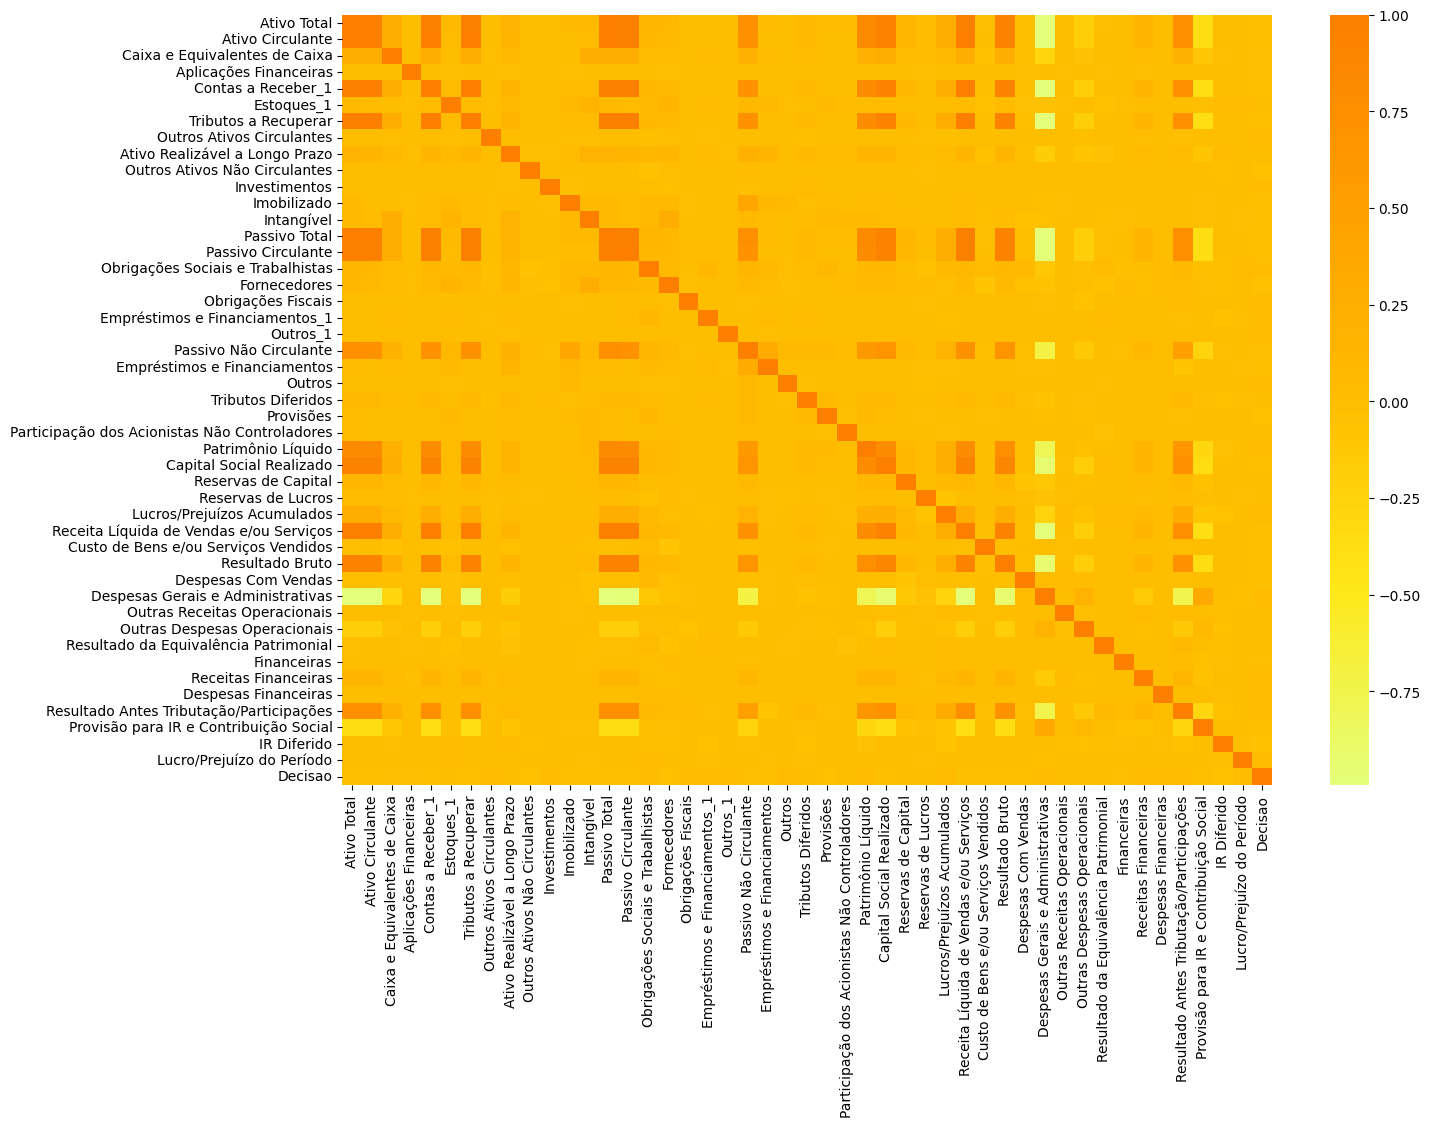

In [22]:
correlacoes = base_dados.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlacoes, cmap="Wistia", ax=ax)
plt.show()

Vamos remover Todas as Colunas "já explicadas" pelo Ativo Total

In [23]:
correlacoes_encontradas = []
for coluna in correlacoes:
    for linha in correlacoes.index:
        if linha != coluna:
            valor = abs(correlacoes.loc[linha, coluna])
            if valor > 0.8 and (coluna, linha, valor) not in correlacoes_encontradas:
                correlacoes_encontradas.append((linha, coluna, valor))
                print(f"Correlação Encontrada: {linha} e {coluna}, Valor: {valor}")

Correlação Encontrada: Ativo Circulante e Ativo Total, Valor: 0.9936191613034182
Correlação Encontrada: Contas a Receber_1 e Ativo Total, Valor: 0.9897313992744241
Correlação Encontrada: Tributos a Recuperar e Ativo Total, Valor: 0.9911861955025305
Correlação Encontrada: Passivo Total e Ativo Total, Valor: 1.0
Correlação Encontrada: Passivo Circulante e Ativo Total, Valor: 0.9856898107136653
Correlação Encontrada: Patrimônio Líquido e Ativo Total, Valor: 0.8121568265673584
Correlação Encontrada: Capital Social Realizado e Ativo Total, Valor: 0.9407784719550619
Correlação Encontrada: Receita Líquida de Vendas e/ou Serviços e Ativo Total, Valor: 0.991369135249478
Correlação Encontrada: Resultado Bruto e Ativo Total, Valor: 0.9357493661129012
Correlação Encontrada: Despesas Gerais e Administrativas e Ativo Total, Valor: 0.9844249841100213
Correlação Encontrada: Contas a Receber_1 e Ativo Circulante, Valor: 0.9951703200197722
Correlação Encontrada: Tributos a Recuperar e Ativo Circulante, 

In [24]:
remover = ['Ativo Circulante', 'Contas a Receber_1', 'Tributos a Recuperar', 'Passivo Total', 'Passivo Circulante', 'Patrimônio Líquido', 'Capital Social Realizado', 'Receita Líquida de Vendas e/ou Serviços', 'Resultado Bruto', 'Despesas Gerais e Administrativas']
base_dados = base_dados.drop(remover, axis = 1)

In [25]:
print(base_dados.shape)

(1882, 37)


Feature Selection

In [26]:
#Vamos treinar uma arvore de decisão e pegar as acaracteristicas mais importantes dela
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(random_state=1)
x = base_dados.drop("Decisao", axis=1)
y = base_dados["Decisao"]
modelo.fit(x,y)

caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)
display(caracteristicas_importantes)
top10 = list(caracteristicas_importantes.index)[:10]
print(top10)

,0
Fornecedores,0.032418
Outros Ativos Circulantes,0.031265
Lucros/Prejuízos Acumulados,0.031182
Resultado Antes Tributação/Participações,0.030940
Ativo Total,0.030832
Obrigações Sociais e Trabalhistas,0.030454
Obrigações Fiscais,0.030394
Custo de Bens e/ou Serviços Vendidos,0.030036
Resultado da Equivalência Patrimonial,0.029478
Tributos Diferidos,0.028723


['Fornecedores', 'Outros Ativos Circulantes', 'Lucros/Prejuízos Acumulados', 'Resultado Antes Tributação/Participações', 'Ativo Total', 'Obrigações Sociais e Trabalhistas', 'Obrigações Fiscais', 'Custo de Bens e/ou Serviços Vendidos', 'Resultado da Equivalência Patrimonial', 'Tributos Diferidos']


Aplicação do StandardScaler para melhorar nossos modelos de MachineLearning

In [27]:
from sklearn.preprocessing import StandardScaler

def ajustar_scaler(tabela_original):
    scaler = StandardScaler()
    tabela_auxiliar = tabela_original.drop("Decisao", axis=1)
    
    tabela_auxiliar = pd.DataFrame(scaler.fit_transform(tabela_auxiliar), tabela_auxiliar.index, tabela_auxiliar.columns)
    tabela_auxiliar["Decisao"] = tabela_original["Decisao"]
    return tabela_auxiliar

nova_base_dados = ajustar_scaler(base_dados)
top10.append("Decisao") 

nova_base_dados = nova_base_dados[top10].reset_index(drop=True)
display(nova_base_dados)

,Fornecedores,Outros Ativos Circulantes,Lucros/Prejuízos Acumulados,Resultado Antes Tributação/Participações,Ativo Total,Obrigações Sociais e Trabalhistas,Obrigações Fiscais,Custo de Bens e/ou Serviços Vendidos,Resultado da Equivalência Patrimonial,Tributos Diferidos,Decisao
0,-0.128485,-0.034116,0.191517,-0.038799,-0.057810,-4.396845,-0.054656,0.033336,-0.004714,-0.090125,2
1,2.127262,-0.027903,11.816382,33.145593,43.006573,4.066346,0.063274,-0.123545,0.116959,2.210854,0
2,0.156604,-0.032969,0.090433,0.004217,-0.038324,0.630917,-0.056533,0.020923,4.755571,-0.028989,2
3,0.847219,-0.032883,-0.460858,0.180279,0.099339,1.239917,-0.008098,-0.138281,0.105892,0.164927,2
4,-0.440745,-0.032706,0.191517,-0.123777,-0.132114,-1.283224,-0.059637,0.110711,0.002491,-0.209187,0
...,...,...,...,...,...,...,...,...,...,...,...
1877,0.216744,-0.034214,-0.020459,-0.072927,-0.021564,0.169052,-0.047162,0.044559,-0.004714,-0.217314,2
1878,-0.353377,-0.032037,-0.460858,-0.121127,-0.093283,-1.717283,-0.047889,0.023173,-0.004714,-0.085117,0
1879,0.644715,-0.032350,0.191517,0.219528,0.333928,1.088392,0.022044,0.051061,-0.004714,-0.228295,2
1880,0.625836,-0.032183,-0.289212,-0.176608,0.165020,4.644577,0.016299,-0.009419,-0.004714,0.550222,0


Separação dos dados de treino e dados de teste

In [28]:
from sklearn.model_selection import train_test_split

x = nova_base_dados.drop("Decisao", axis=1)
y = nova_base_dados["Decisao"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=1)

Criação de um Dummy Classifier

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

dummy = DummyClassifier(strategy="stratified", random_state=2)
dummy.fit(x_treino, y_treino)
previsao_dummy = dummy.predict(x_teste)


Métricas de Avaliação
Precisão vai ser nossa métrica principal
Recall pode ser útil, mas precisão no caso de ações é mt mais importante.

Dummy
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       231
           2       0.49      0.46      0.47       240

    accuracy                           0.48       471
   macro avg       0.48      0.48      0.48       471
weighted avg       0.48      0.48      0.48       471



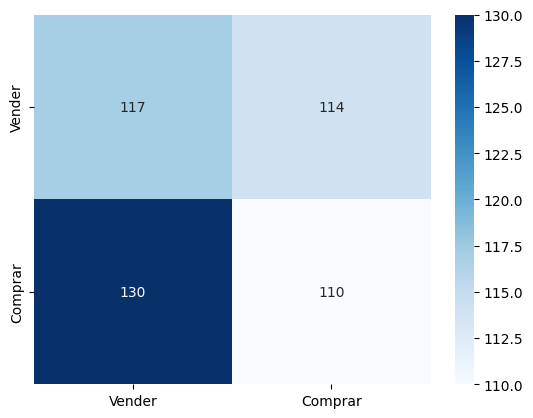

######################################################################


In [30]:
def avaliar(y_teste, previsoes, nome_modelo):
    print(nome_modelo)
    report = classification_report(y_teste, previsoes)
    print(report)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index=["Vender", "Comprar"], columns=["Vender", "Comprar"])
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt=',')
    plt.show()
    print("#" * 70)
avaliar(y_teste, previsao_dummy, "Dummy")

Modelos testados
AdaBoost
Decision Tree
Random Forest
ExtraTree
Gradient Boost
K Nearest Neighbors (KNN)
Logistic Regression
Naive Bayes
Support Vector Machine (SVM)
Rede Neural

In [31]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost": GradientBoostingClassifier(random_state=1),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=1),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(random_state=1),
    "RedeNeural": MLPClassifier(random_state=1, max_iter=400),
}

AdaBoost
              precision    recall  f1-score   support

           0       0.53      0.54      0.54       231
           2       0.55      0.54      0.55       240

    accuracy                           0.54       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.54      0.54      0.54       471



c:\Users\Yago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



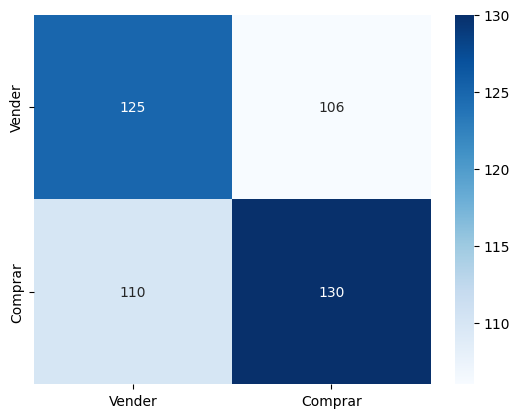

######################################################################
DecisionTree
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       231
           2       0.52      0.49      0.50       240

    accuracy                           0.51       471
   macro avg       0.51      0.51      0.51       471
weighted avg       0.51      0.51      0.51       471



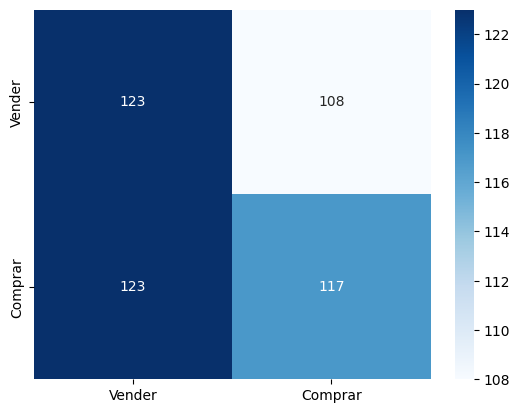

######################################################################
RandomForest
              precision    recall  f1-score   support

           0       0.54      0.56      0.55       231
           2       0.56      0.53      0.54       240

    accuracy                           0.55       471
   macro avg       0.55      0.55      0.55       471
weighted avg       0.55      0.55      0.55       471



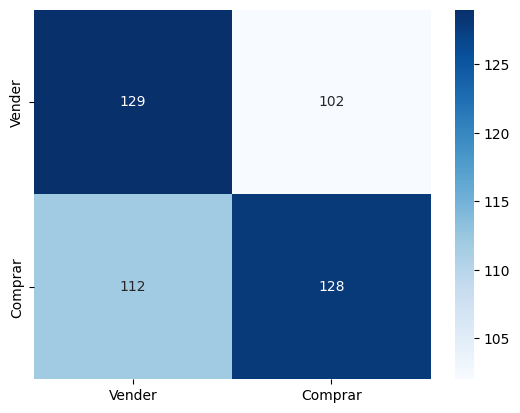

######################################################################
ExtraTree
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       231
           2       0.54      0.51      0.52       240

    accuracy                           0.53       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.53      0.53      0.53       471



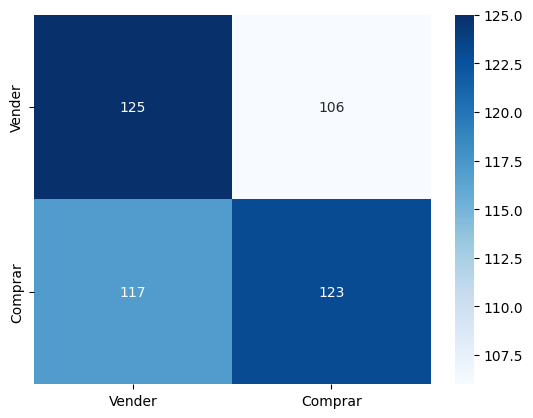

######################################################################
GradientBoost
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       231
           2       0.53      0.54      0.53       240

    accuracy                           0.52       471
   macro avg       0.52      0.52      0.52       471
weighted avg       0.52      0.52      0.52       471



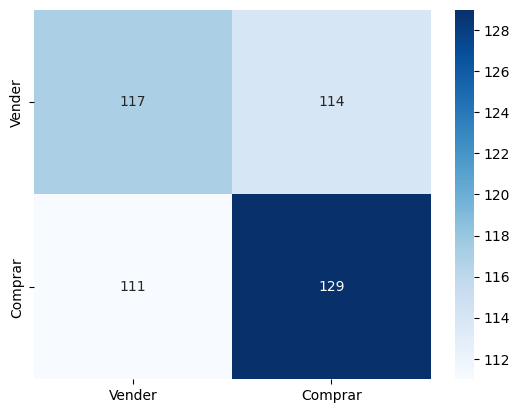

######################################################################
KNN
              precision    recall  f1-score   support

           0       0.53      0.54      0.53       231
           2       0.55      0.54      0.55       240

    accuracy                           0.54       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.54      0.54      0.54       471



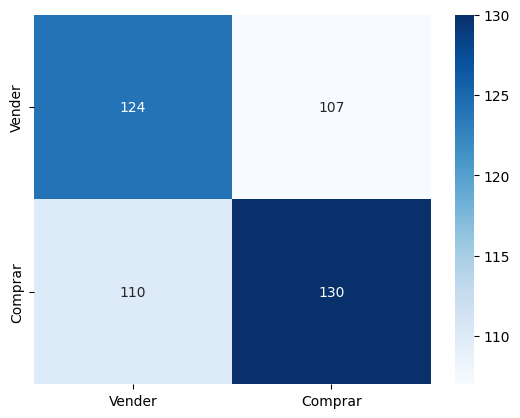

######################################################################
LogisticRegression
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       231
           2       0.53      0.47      0.50       240

    accuracy                           0.52       471
   macro avg       0.52      0.52      0.52       471
weighted avg       0.52      0.52      0.52       471



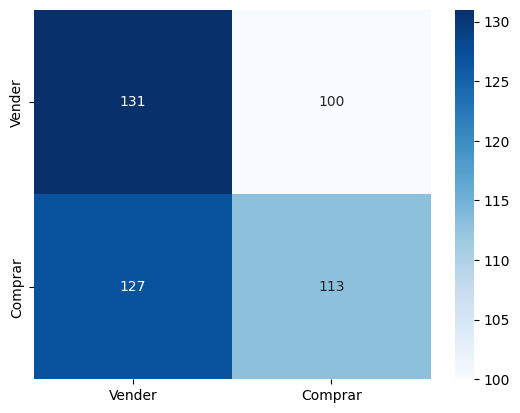

######################################################################
NaiveBayes
              precision    recall  f1-score   support

           0       0.48      0.89      0.63       231
           2       0.46      0.09      0.15       240

    accuracy                           0.48       471
   macro avg       0.47      0.49      0.39       471
weighted avg       0.47      0.48      0.39       471



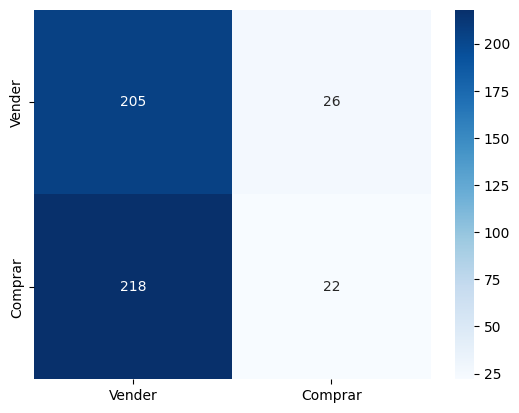

######################################################################
SVM
              precision    recall  f1-score   support

           0       0.51      0.73      0.60       231
           2       0.56      0.33      0.41       240

    accuracy                           0.52       471
   macro avg       0.53      0.53      0.51       471
weighted avg       0.53      0.52      0.50       471



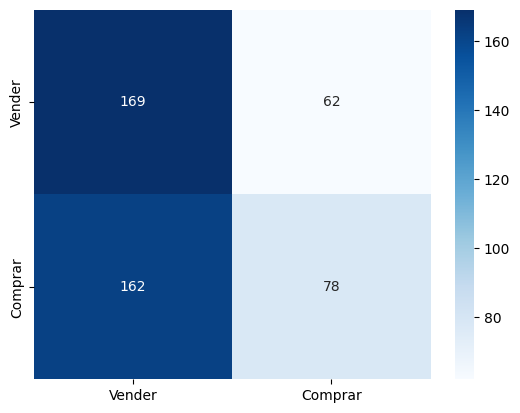

######################################################################
RedeNeural
              precision    recall  f1-score   support

           0       0.52      0.64      0.57       231
           2       0.55      0.42      0.48       240

    accuracy                           0.53       471
   macro avg       0.53      0.53      0.52       471
weighted avg       0.53      0.53      0.52       471



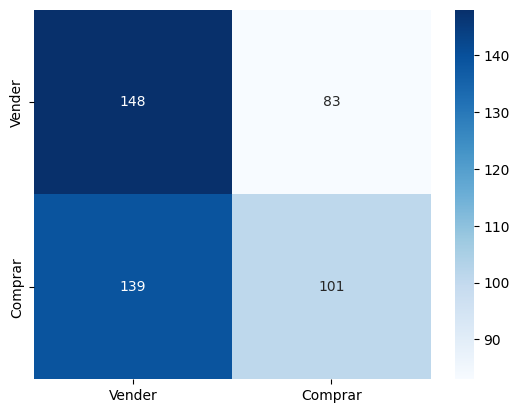

######################################################################


In [32]:
for nome_modelo in modelos:
    modelo = modelos[nome_modelo]
    modelo.fit(x_treino, y_treino)
    previsoes = modelo.predict(x_teste)
    avaliar(y_teste, previsoes, nome_modelo)
    modelos[nome_modelo] = modelo

Tunning do modelo

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

modelo_final = modelos["RandomForest"]

n_estimators = range(10, 251, 30)
max_features = list(range(2, 11, 2))
max_features.append('auto')
min_samples_split = range(2, 11, 2)

precision2_score = make_scorer(precision_score, labels=[2], average='macro')

grid = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators': n_estimators,
            'max_features': max_features,
            'min_samples_split': min_samples_split,
            'random_state': [1],
        },
        scoring=precision2_score,
)

resultado_grid = grid.fit(x_treino, y_treino)
print("Ajuste feito")

c:\Users\Yago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Yago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
    

Ajuste feito


RandomForest Tunado
              precision    recall  f1-score   support

           0       0.53      0.62      0.57       231
           2       0.56      0.47      0.52       240

    accuracy                           0.55       471
   macro avg       0.55      0.55      0.54       471
weighted avg       0.55      0.55      0.54       471



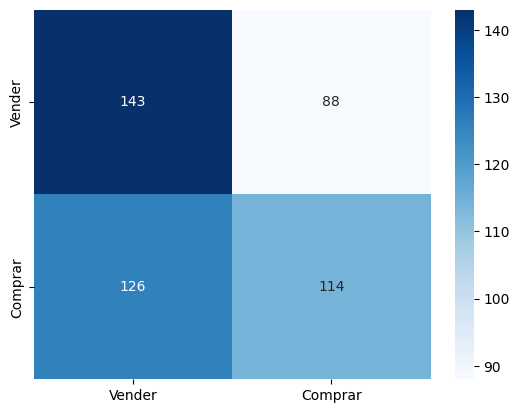

######################################################################


In [35]:
modelo_tunado = resultado_grid.best_estimator_
previsoes = modelo_tunado.predict(x_teste)
avaliar(y_teste, previsoes, "RandomForest Tunado")

Modelo RandomForest tunado foi a escolha
Repetindo os passos com a base fundamentos só que pegando apenas o último tri de cada empresa

In [41]:
ult_tri_fundamentos = fundamentos.copy()
lista_empresas = []
lista_df = []

for empresa in ult_tri_fundamentos:
    df_empresa = ult_tri_fundamentos[empresa][-1:].reset_index(drop=True)
    lista_df.append(df_empresa)
    lista_empresas.append(empresa)

ult_tri_base_dados = pd.concat(lista_df, ignore_index=True)

display(ult_tri_base_dados)
print(lista_empresas)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Decisao
0,-0.014641,-0.096069,-0.210989,0.178183,0.035174,0.035968,-0.053483,0.464569,0.338638,0.000000,...,-2.201752,0.143065,1.000000,4.803230,0.271435,2.481764,1.000000,-1.000000,1.983122,0
1,0.021032,0.060388,0.114767,0.054163,0.191414,0.000000,0.097072,-0.601857,0.047464,0.000000,...,0.813033,0.236324,1.000000,0.397435,0.653082,0.040481,-0.796482,0.024238,-0.034832,0
2,-0.065052,-0.090455,-0.049868,-0.303305,0.019817,-0.104190,0.039895,-0.198159,0.136495,0.000000,...,-0.628015,0.000000,-0.140260,-1.000000,1.000000,0.362254,-0.062285,10.778637,0.956088,0
3,0.077453,0.757451,3.909083,0.000000,-1.000000,0.000000,0.000000,0.000000,0.260903,0.000000,...,-213.763780,2.023065,-0.056459,-0.209859,0.299164,1.953086,0.000000,0.000000,1.739273,0
4,-0.029646,-0.042750,-0.335301,0.003408,0.428888,0.073564,1.335030,0.474968,-0.029399,0.000000,...,0.815659,0.000000,-0.067332,1.109213,-0.216112,0.609079,-2.668301,1.000000,3.192166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.059826,0.281415,0.404819,0.000000,0.453531,-0.135756,-0.009355,0.769217,-0.117712,-0.465480,...,-9.237912,-6.941333,0.500872,-0.063966,0.480029,-0.724239,-1.607730,1.000000,-0.691015,0
57,-0.004568,-0.144531,-0.310447,0.000000,-0.022350,0.216183,-0.125387,-0.060282,-0.001100,-0.112840,...,0.265281,-0.151625,-16.417323,-0.548024,-0.069133,0.094810,1.000000,-0.284516,0.067110,0
58,0.099594,0.079650,0.406221,0.000000,0.003426,0.108797,-0.061279,0.032653,0.223863,0.054348,...,-0.558935,-0.250000,0.336449,0.000000,0.000000,-0.973077,0.000000,0.000000,-0.430508,0
59,0.046146,0.084131,0.487545,-0.395777,-0.041297,0.042082,-0.040685,0.203724,-0.188943,0.000000,...,-0.275642,-0.817027,1.000000,0.273026,-0.054605,0.107135,-0.119981,1.451443,0.152089,0


['ABEV3', 'B3SA3', 'BEEF3', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CSAN3', 'CSNA3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HGTX3', 'HYPE3', 'IGTA3', 'ITSA4', 'JBSS3', 'JHSF3', 'LAME4', 'LCAM3', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR4', 'PRIO3', 'QUAL3', 'RADL3', 'RENT3', 'SBSP3', 'SULA11', 'SUZB3', 'TAEE11', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT3', 'VVAR3', 'WEGE3', 'YDUQ3']


In [42]:
ult_tri_base_dados = ult_tri_base_dados.reset_index(drop=True)
ult_tri_base_dados = ult_tri_base_dados[top10]
ult_tri_base_dados = ajustar_scaler(ult_tri_base_dados)
ult_tri_base_dados = ult_tri_base_dados.drop("Decisao", axis = 1)

display(ult_tri_base_dados)

,Fornecedores,Outros Ativos Circulantes,Lucros/Prejuízos Acumulados,Resultado Antes Tributação/Participações,Ativo Total,Obrigações Sociais e Trabalhistas,Obrigações Fiscais,Custo de Bens e/ou Serviços Vendidos,Resultado da Equivalência Patrimonial,Tributos Diferidos
0,0.089354,1.124919,-0.789951,1.272495,-0.633966,-1.070404,-0.127804,0.212417,0.156205,0.007209
1,1.605723,-1.521465,-0.789951,-0.378475,-0.086322,0.219636,-0.126082,-4.318382,0.205891,0.236314
2,-0.460904,-0.519670,-0.789951,-0.160870,-1.407888,0.416153,-0.131067,0.158271,0.079983,0.032961
3,-0.759435,-0.027929,3.131016,0.914965,0.779875,0.219636,7.745880,0.486425,1.157823,0.104251
4,-0.215742,1.150726,0.705938,0.006051,-0.864327,-1.101884,-0.129427,0.147306,0.079983,-1.639972
...,...,...,...,...,...,...,...,...,...,...
56,-0.755353,1.880917,-0.789951,-0.895634,0.509258,1.217337,-0.129721,-0.010364,-3.618192,0.098970
57,-0.910336,-0.177522,-0.789951,-0.341734,-0.479332,-0.971126,-0.130842,0.449174,-0.000799,0.381154
58,0.062931,0.053101,-0.657707,-1.063916,1.119782,1.143185,-0.127364,-0.309313,-0.053211,0.104251
59,-0.728711,0.477621,-0.789951,-0.333399,0.299231,-1.606963,-0.129826,0.483288,-0.355309,-0.122833


In [44]:
previsoes_ult_tri = modelo_tunado.predict(ult_tri_base_dados)
print(previsoes_ult_tri)

carteira = []
carteira_inicial = []

for i, empresa in enumerate(lista_empresas):
    if previsoes_ult_tri[i] == 2:
        print(empresa)
        carteira_inicial.append(1000)
        cotacao = cotacoes[empresa]
        cotacao = cotacao.set_index("Date")
        cotacao_inicial = cotacao.loc["2020-12-31", "Adj Close"]
        cotacao_final = cotacao.loc["2021-03-31", "Adj Close"]
        percentual = cotacao_final / cotacao_inicial
        carteira.append(1000 * percentual)
        
saldo_inicial = sum(carteira_inicial)
saldo_final = sum(carteira)
print(saldo_inicial, saldo_final)
print(saldo_final / saldo_inicial)

[0 0 2 2 2 2 0 2 0 0 2 2 2 0 0 2 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2
 0 2 0 2 0 2 0 2 0 2 0 0 2 0 2 0 0 0 0 2 2 0 2 0]
BEEF3
BRAP4
BRFS3
BRKM5
BTOW3
CMIG4
COGN3
CPFE3
CSNA3
ECOR3
ELET6
EMBR3
ENEV3
ENGI11
EQTL3
EZTC3
FLRY3
HGTX3
HYPE3
IGTA3
JBSS3
JHSF3
LAME4
LREN3
MRFG3
MULT3
PETR4
QUAL3
SBSP3
SUZB3
VALE3
VIVT3
WEGE3
33000 33907.91311989946
1.027512518784832


Comparação de previsão de decisões com o IBOV

In [46]:
variacao_ibov = df_ibov.loc["2021-03-31", "IBOV"] / df_ibov.loc["2020-12-31", "IBOV"]
print(variacao_ibov)

0.9776038086936114


In [ ]:
#armazenar a inteligencia artificial
# import joblib

# joblib.dump(modelo_tunado, "ia_carteiraacoes.joblib")

# modelo_tunado = joblib.load("ia_carteiraacoes.joblib")